In [1]:
using LinearAlgebra
using Distributions
#using Plots
using LaTeXStrings
using Printf
using FileIO
import JLD2

In [2]:
using DataFrames


In [99]:
#using StatsPlots


In [3]:
using Base.Threads
println("Threads: ", nthreads())


Threads: 4


In [3]:
using Revise
using Newtrinos
using Newtrinos.osc

In [5]:
using Pkg
Pkg.status() 

Status `~/.julia/environments/myenv/Project.toml`
  [336ed68f] CSV v0.10.15
⌃ [13f3f980] CairoMakie v0.13.6
⌃ [7073ff75] IJulia v1.27.0
  [5b289081] Newtrinos v1.0.0-DEV `~/Newtrinos.jl`
⌃ [295af30f] Revise v3.7.5
⌃ [3cd96dde] UnROOT v0.8.20
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [4]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NND(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg)

Newtrinos.osc.Osc(OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}(NND(ThreeFlavour(:NO)), SI(), Basic(), Newtrinos.osc.All()), (θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761, δCP = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, m₀ = 0.1, N = 20.0, r = 1.0), (θ₁₂ = Uniform{Float64}(a=0.4205343352839651, b=0.7853981633974483), θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976), δCP = Uniform{Float64}(a=0.0, b=6.283185307179586), Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), m₀ = LogUniform{Float64}(a=0.001, b=1.0), N = Uniform{Float64}(a=1.0, b=45.0), r = Uniform{Float64}(a=1.0e-8, b=1.0)), Newtrinos.osc.var"#get_Nnaturalness#45"(), Newtrinos.osc.var"#osc_prob#39"{Newtrinos.osc.var"#osc_prob#37#40"{OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}}}(Newtrinos.osc.var"#osc_prob#37#40"{OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}}(Oscillatio

In [5]:

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()

physics = (; osc, atm_flux, earth_layers);

In [8]:
experiments = (
 
    kamland = Newtrinos.kamland.configure(physics),
);

[ Info: Loading kamland data


In [9]:
p = Newtrinos.get_params(experiments)

(N = 20.0, kamland_energy_scale = 0.0, kamland_flux_scale = 0.0, kamland_geonu_scale = 0.0, m₀ = 0.1, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

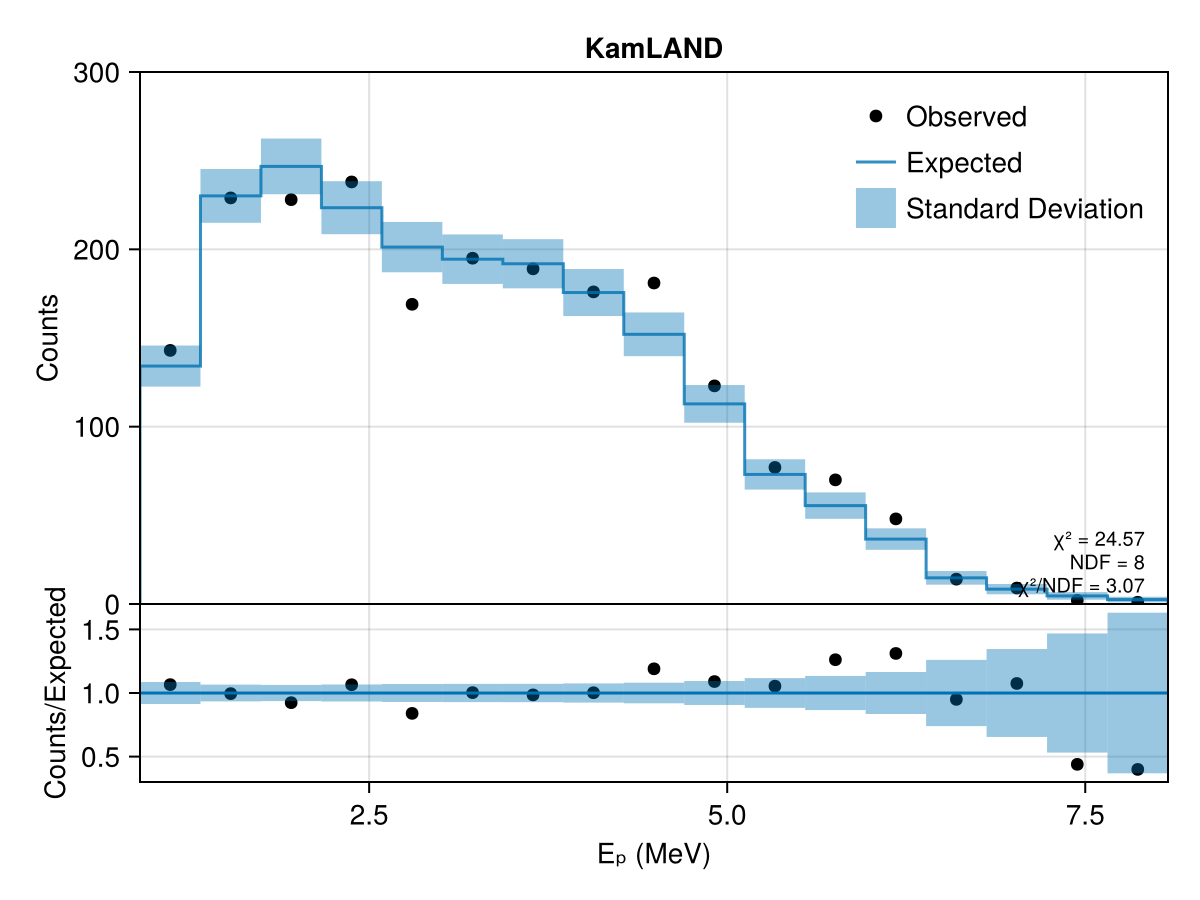

In [107]:
img = experiments.kamland.plot(p)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/profiled plot/kamland/data_kamland_SM.png", img)

In [10]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = (r =31, N = 31)  

modified_priors = (
    N =all_priors.N, 
    m₀= p.m₀,
    r = all_priors.r,
    
   
  

    Δm²₂₁ =all_priors.Δm²₂₁,  
    Δm²₃₁ = p.Δm²₃₁ , 
    δCP = p.δCP,    
    θ₁₂ =p.θ₁₂,    
    θ₁₃= p.θ₁₃,       
    θ₂₃ = p.θ₂₃   
    

)


(N = Uniform{Float64}(a=1.0, b=70.0), m₀ = 0.1, r = Uniform{Float64}(a=1.0e-8, b=1.0), Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [11]:

likelihood = Newtrinos.generate_likelihood(experiments);


In [ ]:

result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, p)

Progress:  88%|████████████████████████████████████     |  ETA: 0:07:13

In [60]:
#likelihood = Newtrinos.generate_likelihood(experiments);
#result = Newtrinos.scan(likelihood, Newtrinos.get_priors(experiments), (θ₁₃=31, Δm²₃₁=31), p)
#result = Newtrinos.profile(likelihood,  Newtrinos.get_priors(experiments), (r=31, m₀=31), p; gradient_map=false)

In [12]:
JLD2.@load"scan_kamland_rN_m0=0.1_NNM.jld2" result


1-element Vector{Symbol}:
 :result

In [7]:
using CairoMakie

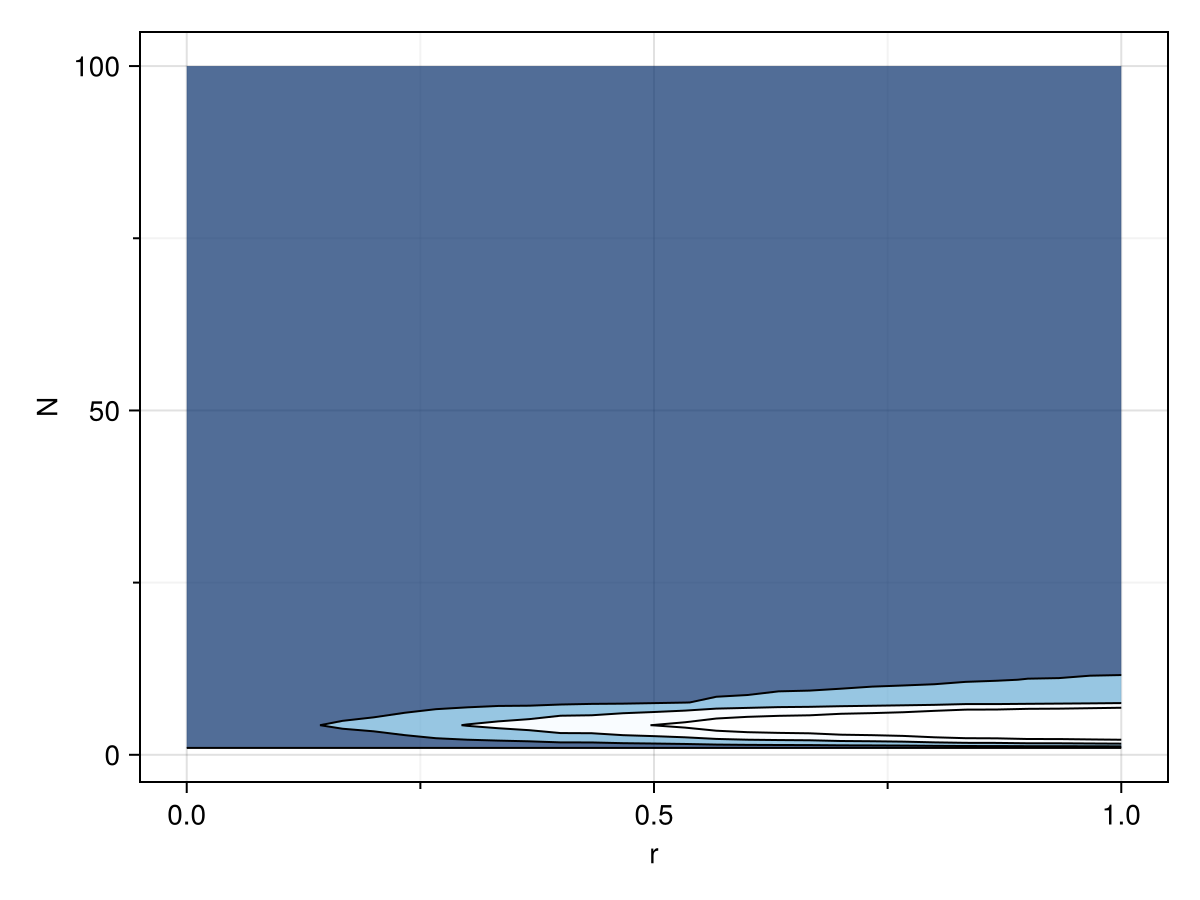

In [13]:
img = CairoMakie.plot(result)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/profiled plot/kamland/kamland_rN_m0=0.1_NNM.png", img)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/dYDv2/src/scenes.jl:238


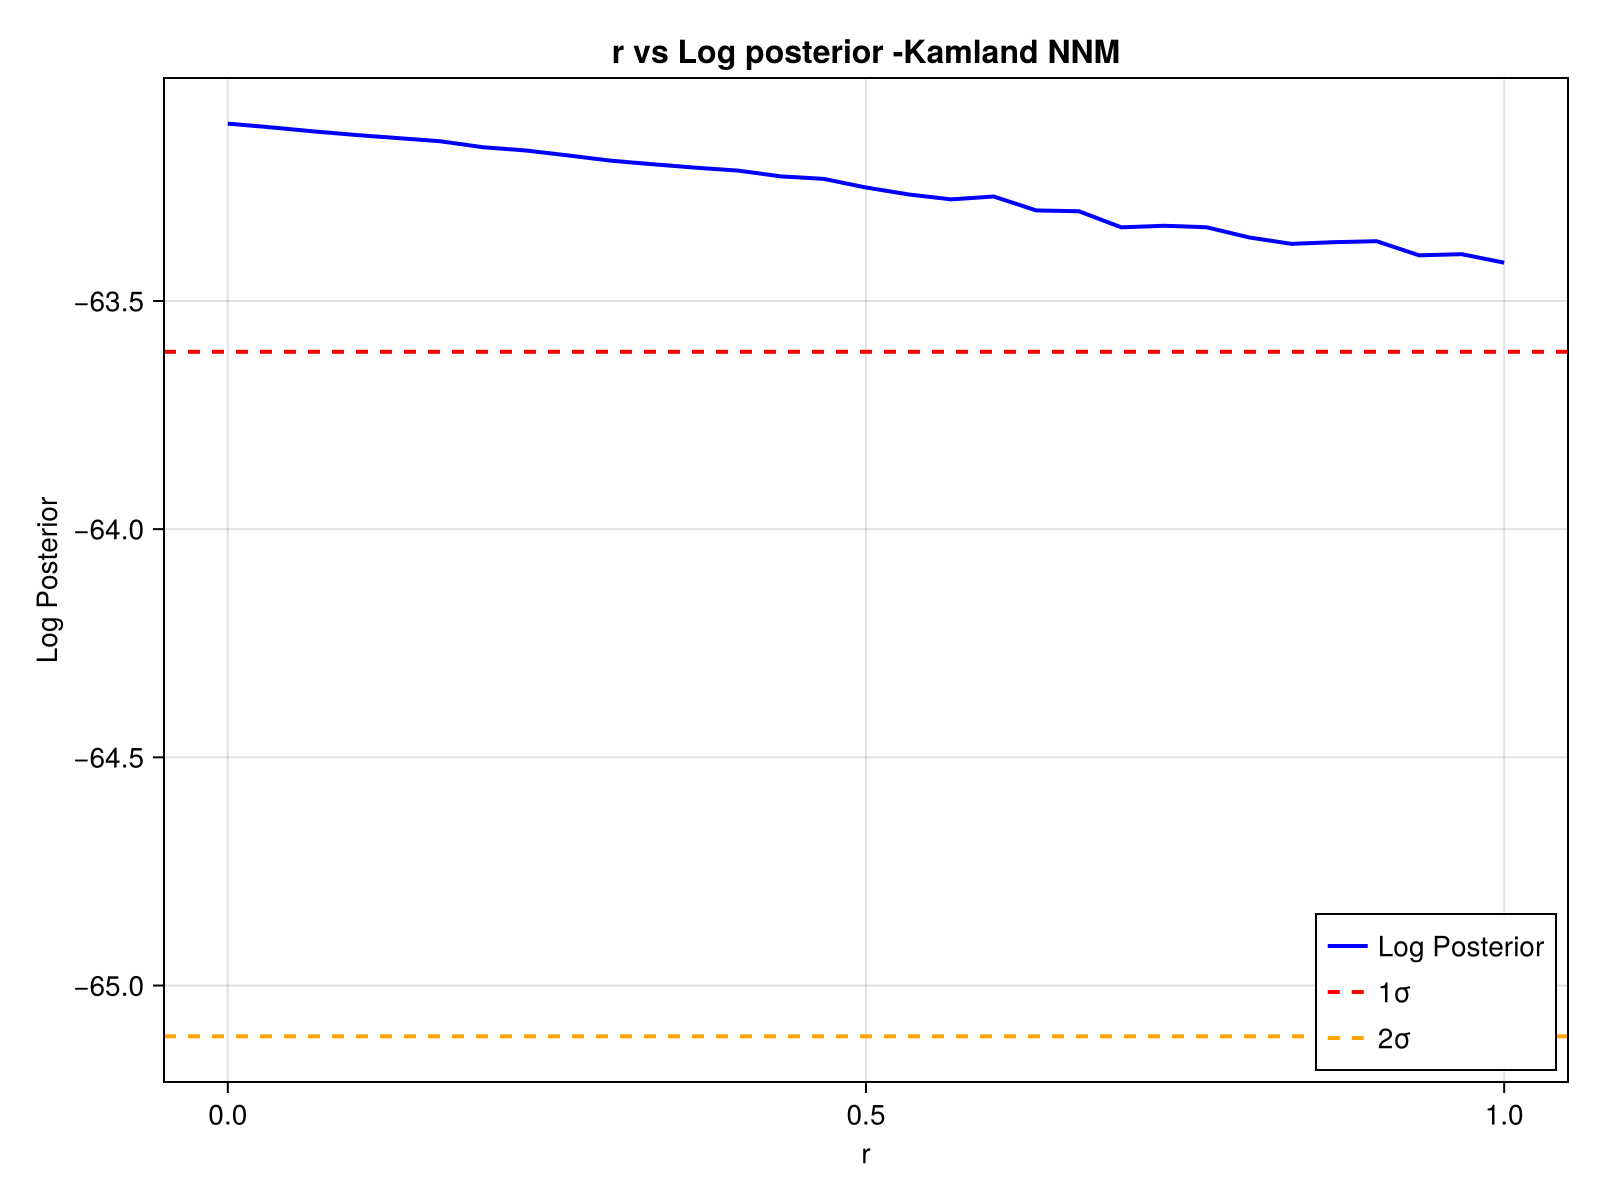

In [14]:
bf = Newtrinos.bestfit(result)
#best_delta_idx = argmax(result.values.log_posterior)[2]

# Calculate confidence intervals
sigma_1_threshold = maximum(result.values.log_posterior[:, 7]) - 0.5
sigma_2_threshold = maximum(result.values.log_posterior[:, 7]) - 2.0

# Create the plot
fig = Figure(resolution = (800, 600))
ax = Axis(fig[1, 1],
    xlabel = "r",
    ylabel = "Log Posterior",
    title = "r vs Log posterior -Kamland NNM",
    titlesize = 16,
    xlabelsize = 14,
    ylabelsize = 14
)

# Plot the main curve
lines!(ax, result.axes.r, result.values.log_posterior[:, 7],
    color = :blue,
    linewidth = 2,
    label = "Log Posterior"
)

# Add confidence level lines
hlines!(ax, [sigma_1_threshold], 
    color = :red, 
    linestyle = :dash, 
    linewidth = 2,
    label = "1σ"
)

hlines!(ax, [sigma_2_threshold], 
    color = :orange, 
    linestyle = :dash, 
    linewidth = 2,
    label = "2σ"
)



# Add legend
axislegend(ax, position = :rb)  # right bottom

display("image/png", fig)
save("/home/sofialon/Newtrinos.jl/profiled plot/kamland/kamland_rLogpost_N=25_NND.png", fig)

Likelihood ratio test


In [53]:
JLD2.@load "scan_dayabay_thetadeltam_SM.jld2" result
ll_0 = result.values.llh

JLD2.@load "scan_dayabay_thetadeltam_NND_profN.jld2" result
ll_1 = result.values.llh

pvalue =Newtrinos.likelihood_ratio_test(ll_0,ll_1, 2)

Likelihood Ratio Test Results:
Λ: -0.21
Degrees of freedom: 2
p-value: 1.0


1.0

Oscillations


In [66]:

# STANDARD MODEL
E_range = range(0.002, 0.008, length=1000) 
L=180
L_vec = [L]

osc_cfg_SM = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.ThreeFlavour(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc_SM = Newtrinos.osc.configure(osc_cfg_SM)
 

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()

physics_SM = (; osc=osc_SM, atm_flux, earth_layers);


experiments_SM = (
 
    kamland = Newtrinos.kamland.configure(physics_SM),
);

p_SM = Newtrinos.get_params(experiments_SM)

osc_prob_SM = Newtrinos.osc.get_osc_prob(osc_cfg_SM)


probab_SM = osc_prob_SM(collect(E_range), L_vec, p; anti=true)

[ Info: Loading kamland data


1000×1×3×3 Array{Float64, 4}:
[:, :, 1, 1] =
 0.5328444160207639
 0.46842294337211426
 0.44601848057264504
 0.467756510678217
 0.4420892446467301
 0.38401133675364607
 0.3765592159615382
 0.3933814518888332
 0.36071378400532866
 0.31176837265362123
 0.31188461926432903
 0.3247326053269489
 0.2921732382409402
 ⋮
 0.3934653699129192
 0.3894751475128693
 0.3855897175404817
 0.38183879300059226
 0.37825027491226954
 0.3748499564154767
 0.3716612558256643
 0.3687049811470129
 0.3659991281390004
 0.36355871360118874
 0.3613956451028241
 0.3595186279424389

[:, :, 2, 1] =
 0.19919667650791767
 0.37741478651874527
 0.3768714796109813
 0.21425417781045314
 0.2590383264579828
 0.4365481836656524
 0.3873309776457235
 0.22804256601417372
 0.305559075007893
 0.47654899019332786
 0.40491050123224387
 0.24644816100767905
 0.3305635797075912
 ⋮
 0.3601554079890415
 0.373165733277428
 0.38571566636984606
 0.3976712685441839
 0.4089060425145391
 0.41930228184703855
 0.4287523058304188
 0.437159567695219

In [67]:
# NNATURALNESS WITH DIFFERENT N 


osc_prob = Newtrinos.osc.get_osc_prob(osc_cfg)

p= Newtrinos.get_params(experiments)
p_5 = merge(p, (N = ftype(5),))
p_10 = merge(p, (N = ftype(10),))
p_20 = merge(p, (N = ftype(20),))
p_50 = merge(p, (N = ftype(50),))

probab_5 = osc_prob(collect(E_range), L_vec, p_5; anti=true)
probab_10 = osc_prob(collect(E_range), L_vec, p_10; anti=true)
probab_20 = osc_prob(collect(E_range), L_vec, p_20; anti=true)
probab_50 = osc_prob(collect(E_range), L_vec, p_50; anti=true)

p_0 = merge(p, (r = ftype(0),))
p_025 = merge(p,  (r = ftype(0.25),))
p_05 = merge(p,  (r = ftype(0.5),))
p_1 = merge(p,  (r = ftype(1),))


probab_0 = osc_prob(collect(E_range), L_vec, p_0; anti=true)
probab_025 = osc_prob(collect(E_range), L_vec, p_025; anti=true)
probab_05 = osc_prob(collect(E_range), L_vec, p_05; anti=true)
probab_1 = osc_prob(collect(E_range), L_vec, p_1; anti=true)


1000×1×60×60 Array{Float64, 4}:
[:, :, 1, 1] =
 0.5292937432429183
 0.4658996644978798
 0.4411070999357181
 0.4655508919705132
 0.4369475171601459
 0.38003890107680455
 0.37126523331830513
 0.3876432899950921
 0.3583850318671912
 0.30699977271916085
 0.3096553753229067
 0.3208226208061972
 0.2910632126419063
 ⋮
 0.3936719290342652
 0.385414904884109
 0.3837971930828706
 0.37786681947562534
 0.3775391480092236
 0.37106191896009716
 0.36927294427784324
 0.3667033805812062
 0.3632493017322427
 0.36073821510125326
 0.3602773857094792
 0.3552459853117551

[:, :, 2, 1] =
 0.19735821353678884
 0.37210857248091056
 0.3726633420357013
 0.21140814121393103
 0.25581016992284583
 0.4328559116379307
 0.3809589780678361
 0.22521373073518766
 0.300921973187549
 0.46910082396686564
 0.400946256309223
 0.24225298045257154
 0.32771387495793197
 ⋮
 0.3571301647554806
 0.3684555106268976
 0.38120770361936496
 0.39476640292096804
 0.40363691809009844
 0.41545469177545497
 0.42480423363370023
 0.43276114782

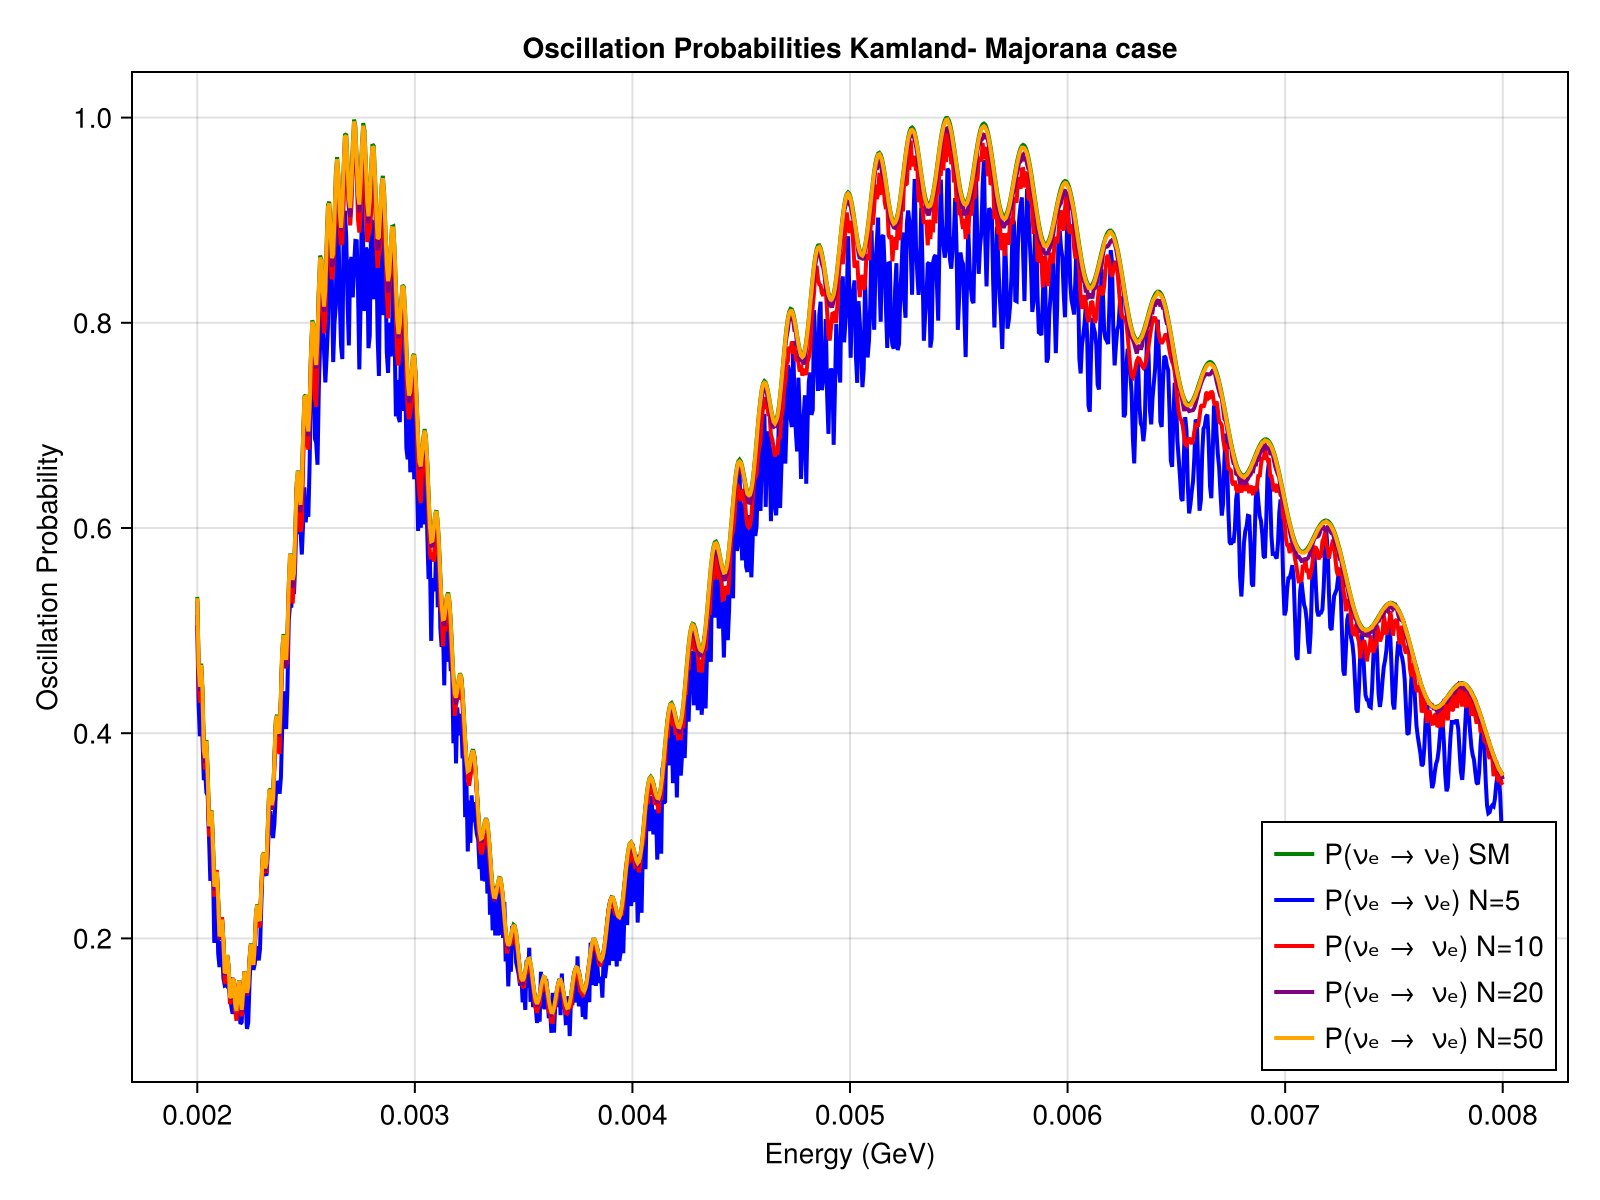

In [68]:

fig = Figure(size=(800, 600))
ax = Axis(fig[1,1], 
    xlabel = "Energy (GeV)",
    ylabel = "Oscillation Probability", 
    title = "Oscillation Probabilities Kamland- Majorana case"
)

# Plot the lines
lines!(ax, E_range, probab_SM[:, 1, 1, 1], label="P(νₑ → νₑ) SM", linewidth=2, color=:green)
lines!(ax, E_range, probab_5[:, 1, 1, 1], label="P(νₑ → νₑ) N=5", linewidth=2, color=:blue)
lines!(ax, E_range, probab_10[:, 1, 1, 1], label="P(νₑ →  νₑ) N=10", linewidth=2, color=:red)
lines!(ax, E_range, probab_20[:, 1, 1, 1], label="P(νₑ →  νₑ) N=20", linewidth=2, color=:purple)
lines!(ax, E_range, probab_50[:, 1, 1, 1], label="P(νₑ →  νₑ) N=50", linewidth=2, color=:orange)

# Add legend and set limits
axislegend(ax, position=:rb)
save("/home/sofialon/Newtrinos.jl/natural plot/kamland/osc_kamland_N_majorana.png", fig)

fig

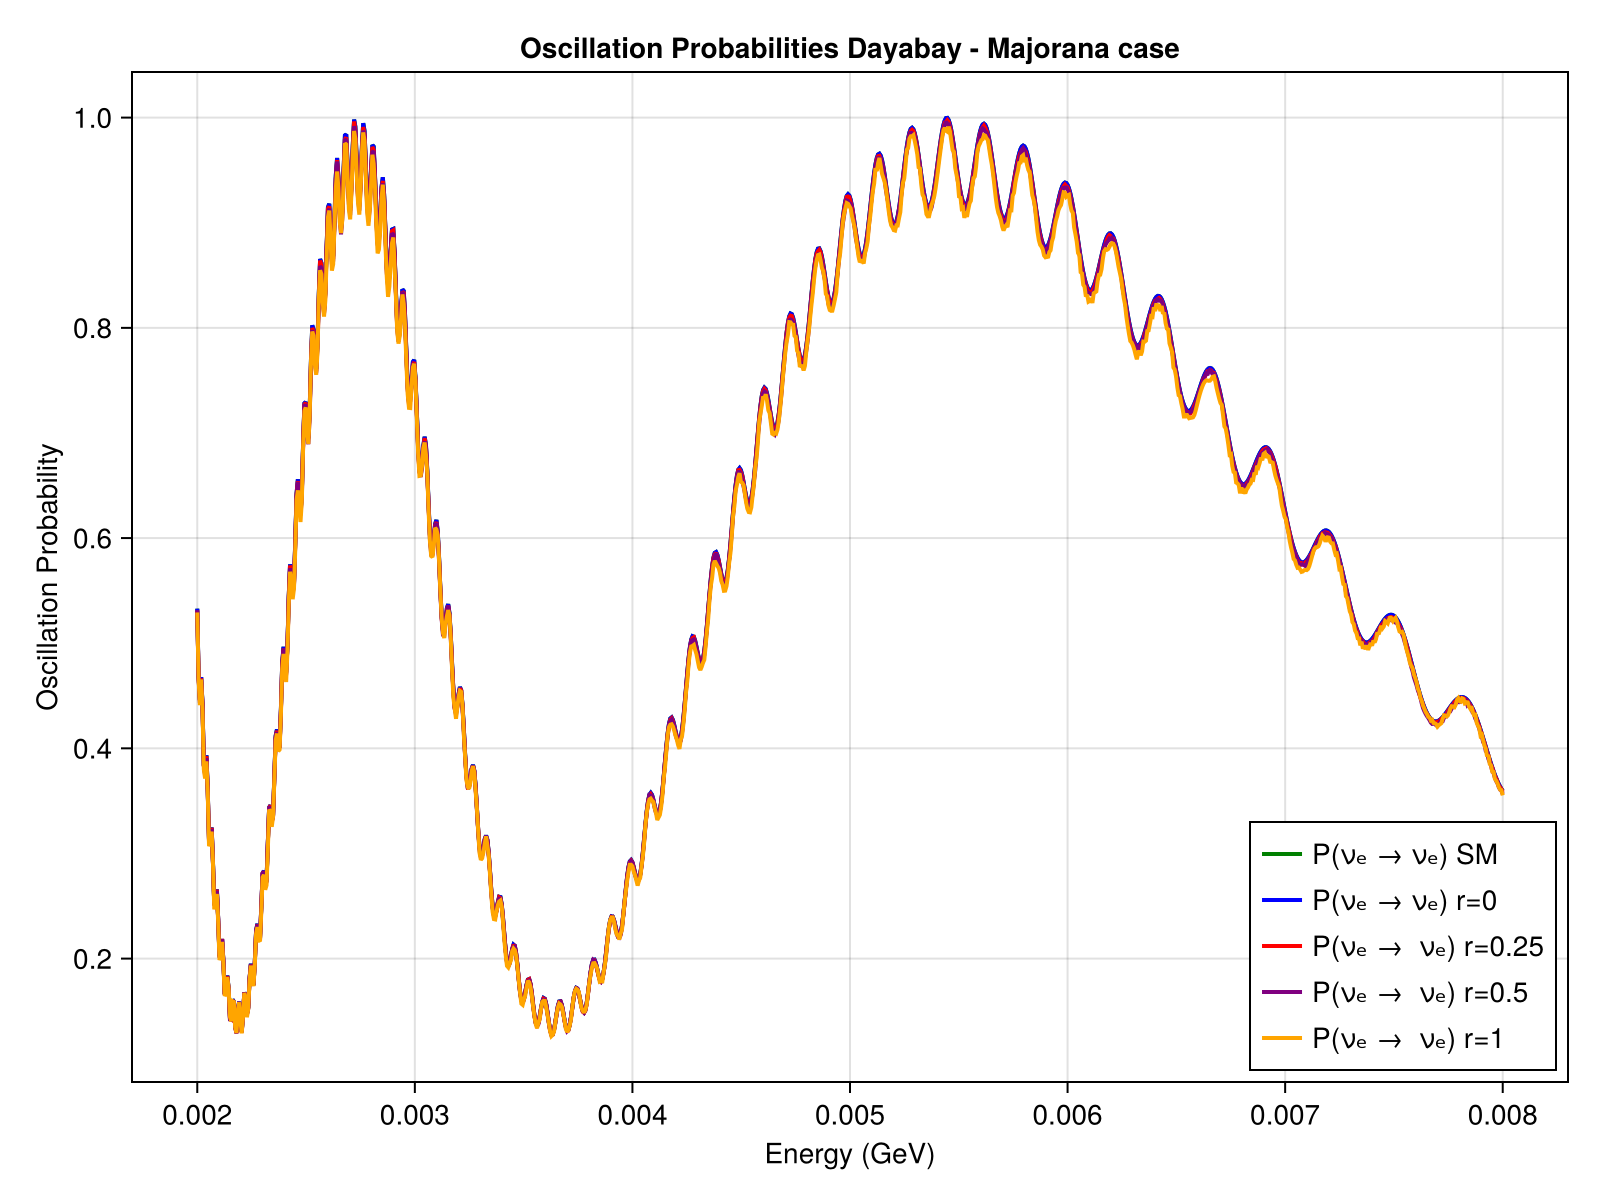

In [69]:

fig = Figure(size=(800, 600))
ax = Axis(fig[1,1], 
    xlabel = "Energy (GeV)",
    ylabel = "Oscillation Probability", 
    title = "Oscillation Probabilities Dayabay - Majorana case"
)

# Plot the lines
lines!(ax, E_range, probab_SM[:, 1, 1, 1], label="P(νₑ → νₑ) SM", linewidth=2, color=:green)
lines!(ax, E_range, probab_0[:, 1, 1, 1], label="P(νₑ → νₑ) r=0", linewidth=2, color=:blue)
lines!(ax, E_range, probab_025[:, 1, 1, 1], label="P(νₑ →  νₑ) r=0.25", linewidth=2, color=:red)
lines!(ax, E_range, probab_05[:, 1, 1, 1], label="P(νₑ →  νₑ) r=0.5", linewidth=2, color=:purple)
lines!(ax, E_range, probab_1[:, 1, 1, 1], label="P(νₑ →  νₑ) r=1", linewidth=2, color=:orange)

# Add legend and set limits
axislegend(ax, position=:rb)
save("/home/sofialon/Newtrinos.jl/natural plot/kamland/osc_kamland_r_dirac.png", fig)

fig